<a href="https://colab.research.google.com/github/Spark095/11101ML/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
iris['data']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
# 已知 k=3
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(iris["data"])

KMeans(n_clusters=3)

In [8]:
# 秀出中心點 
cluster.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [9]:
# 依照中心點show 出 labels
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [10]:
# 可以把分群想像成自已打上答案的動作 (放在相對分類的 ans欄位)，打上答案你就可以存起來
# 後續你想要用任何的分類演算法(決策樹..)都可以
import pandas as pd
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df['labels'] = cluster.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
# 未知K
# 算 2~19 出最高分
from sklearn.metrics import silhouette_score
for k in range(2, 20):
  test = KMeans(n_clusters=k)
  test.fit(iris["data"])
  score = silhouette_score(iris["data"], test.labels_)
  print(k, ":", score)


2 : 0.6810461692117462
3 : 0.5528190123564095
4 : 0.49805050499728737
5 : 0.4930804067193521
6 : 0.36483400396700255
7 : 0.3588294450965685
8 : 0.35745369258527165
9 : 0.3292594186657698
10 : 0.31206534405942193
11 : 0.31318662643646844
12 : 0.29697644674913093
13 : 0.3018000650084135
14 : 0.27677505481502046
15 : 0.26773133965300655
16 : 0.3085917097861133
17 : 0.2938420441169351
18 : 0.2603261106276196
19 : 0.28833682444808023


In [16]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


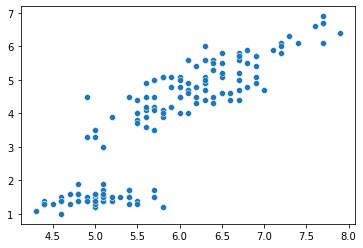

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sl = iris["data"][:, 0]
pl = iris["data"][:, 2]

sns.scatterplot(sl, pl)
#sns.scatterplot(sl, pl, hue=iris["target"])